<a href="https://colab.research.google.com/github/ms0521976/pytorch-cpn/blob/master/word_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 文字雲(Word Cloud)
- Author: Lynn
- Cretaed: 2020/11/2
- Updated: 2021/4/25
- Ref: https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

### 安裝套件

In [ ]:
!pip install wordcloud

### 載入模組

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### 傳入字串產生文字雲

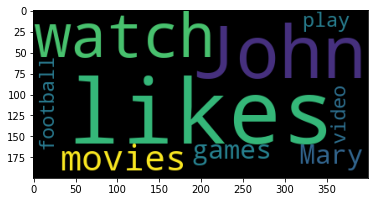

In [ ]:
text = 'John likes to watch movies Mary likes movies too \
John also like to Watch football games \
Mary also likes to play video games'

# 產生文字雲物件
wc = WordCloud()

# 傳入文字字串
wc.generate(text)

# 畫出文字雲
plt.imshow(wc)

### 傳入詞頻產生文字雲

['John', 'likes', 'to', 'watch', 'movies', 'Mary', 'likes', 'movies', 'too', 'John', 'also', 'like', 'to', 'Watch', 'football', 'games', 'Mary', 'also', 'likes', 'to', 'play', 'video', 'games']
Counter({'likes': 3, 'to': 3, 'John': 2, 'movies': 2, 'Mary': 2, 'also': 2, 'games': 2, 'watch': 1, 'too': 1, 'like': 1, 'Watch': 1, 'football': 1, 'play': 1, 'video': 1})


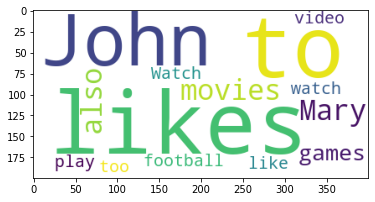

In [ ]:
from collections import Counter

tokens = text.split(' ')
print(tokens)
ct = Counter(tokens)
print(ct)

wc = WordCloud(background_color='white')
wc.generate_from_frequencies(ct)
plt.imshow(wc)

### 前處理後產生文字雲

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

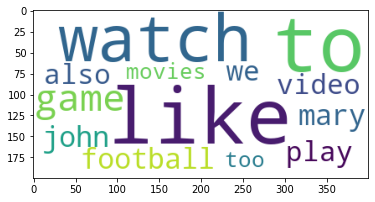

In [ ]:
from collections import Counter
from nltk.stem import WordNetLemmatizer

text = 'John likes to watch football games \
Mary likes to play video games \
We also like to watch movies too'

# 轉小寫
text = text.lower()

# 詞形還原
wnl = WordNetLemmatizer()
tokens = text.split(' ')
tokens = [wnl.lemmatize(token,pos='v') for token in tokens]

# 計算字數(詞頻)
ct = Counter(tokens)

# 產生文字雲
wc = WordCloud(background_color='white')
wc.generate_from_frequencies(ct)
plt.imshow(wc)

## 以 IMDB dataset 為例

### 準備資料

In [ ]:
# 取出電影名稱與電影簡介，各文件之間以空白連接

import pandas as pd

csv = '/content/drive/MyDrive/shared_folder/dataset/imdb/IMDB-Movie-Data.csv'
df = pd.read_csv(csv)

docs = df['Description'].tolist()
titles = df['Title'].tolist()
text = ' '.join(titles) + ' '.join(docs)

### 產生文字雲

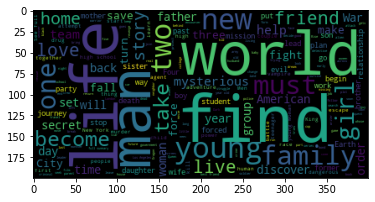

In [ ]:
wc = WordCloud(max_words=200)
wc.generate(text)
plt.imshow(wc)

### 移除停用字，產生文字雲

In [ ]:
from gensim.utils import simple_preprocess
from wordcloud import STOPWORDS

processed_text = ' '.join([token for token in simple_preprocess(text) if token not in STOPWORDS])
print(len(processed_text))

128474


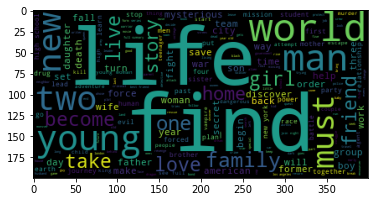

In [ ]:
wc = WordCloud(max_words=200)
wc.generate(processed_text)
plt.imshow(wc)

### 加詞形還原，產生文字雲

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from gensim.utils import simple_preprocess
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

processed_list = []
for token in simple_preprocess(text):
    if token not in STOPWORDS:
        token = lemmatizer.lemmatize(token, pos='v')
        token = lemmatizer.lemmatize(token, pos='n')
        
        processed_list.append(token)

print(len(processed_list))
processed_text = ' '.join(processed_list)

17979


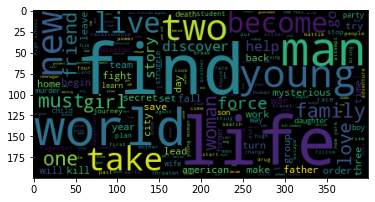

In [ ]:
wc = WordCloud(max_words=200)
wc.generate(processed_text)
plt.imshow(wc)

## 以科技橘報『AI』報導為例

### 處理中文問題

In [ ]:
# 下載台北思源黑體，並命名taipei_sans_tc_beta.ttf
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2021-04-25 11:43:51--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 64.233.188.101, 64.233.188.113, 64.233.188.138, ...
Connecting to drive.google.com (drive.google.com)|64.233.188.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8opi22nhk5nnt2a7j70kgffmipph4hue/1619351025000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2021-04-25 11:43:52--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8opi22nhk5nnt2a7j70kgffmipph4hue/1619351025000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 74.125.204.132, 2404:6800:4008:c04::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|74.125

### 準備資料

In [ ]:
# 將所有文件(報導)以句點連接

csv = '/content/drive/MyDrive/shared_folder/dataset/techorange_ai.csv'
df = pd.read_csv(csv)

titles = df['title'].apply(str).tolist()
contents = df['content'].apply(str).tolist()
text = '。'.join(titles) + '。' + '。'.join(contents)

### 分詞

In [ ]:
!pip install jieba

In [ ]:
import jieba

tokens = jieba.lcut(text)
print(tokens[:10])
print(len(tokens))

# 分詞後以空白連接
new_text = ' '.join(tokens)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.812 seconds.
Prefix dict has been built successfully.


['【', '比綠', '乖乖', '更', '有效', '！', '】', '奔騰', '網路', ' ']
203583


### 產生文字雲

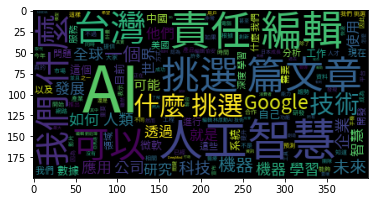

In [ ]:
wc = WordCloud(max_words=200,
               font_path='/content/taipei_sans_tc_beta.ttf')
wc.generate(new_text)
plt.imshow(wc)

### 去停用詞，產生文字雲

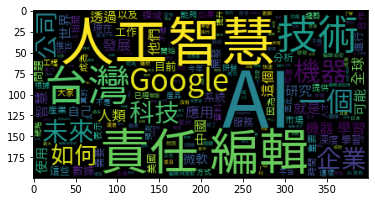

In [ ]:
from wordcloud import STOPWORDS

my_stop_words = ['什麼','可以','我們','挑選','篇文章']
stopwords = list(STOPWORDS) + my_stop_words

wc = WordCloud(max_words=200,
               font_path='/content/taipei_sans_tc_beta.ttf',
               stopwords=stopwords)
wc.generate(new_text)
plt.imshow(wc)

### 自訂背景設產生文字雲

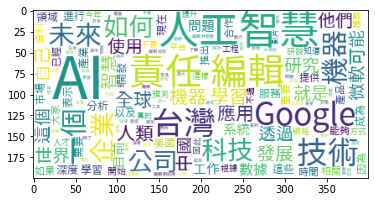

In [ ]:
wc = WordCloud(background_color='white',
               max_words=200,
               font_path='/content/taipei_sans_tc_beta.ttf',
               stopwords=stopwords)
wc.generate(new_text)
plt.imshow(wc)

### 加遮罩(Mask)產生文字雲

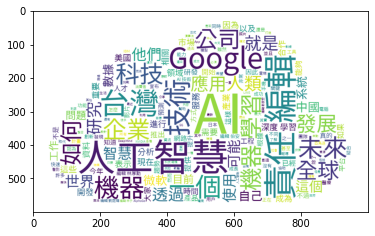

In [ ]:
import numpy as np
from PIL import Image

mask = np.array(Image.open('/content/drive/MyDrive/shared_folder/mask.png'))

wc = WordCloud(background_color='white',
               max_words=200,
               font_path='/content/taipei_sans_tc_beta.ttf',
               stopwords=stopwords,
               mask=mask)
wc.generate(new_text)
plt.imshow(wc)

### 儲存檔案

In [ ]:
wc.to_file('/content/drive/MyDrive/shared_folder/cloudwords.png')